In [1]:
import numpy as np
import random

from specs import suspicion, Trial, Player, Game
from itertools import product

# create game trials

In [ ]:
# game play values
n_red = range(0, 6, 1)
outcome = (1, -1)

# all possible trial parameters
trial_params = (list(product(n_red, outcome)))

In [ ]:
trial_params

In [2]:
# alternate game play values
n_red = (3, 2, 3, 2, 0, 0, 5)
outcome = (-1, -1, 1, 1, -1, 1, 1)

trial_params = list(zip(n_red, outcome))

In [3]:
trial_params

[(3, -1), (2, -1), (3, 1), (2, 1), (0, -1), (0, 1), (5, 1)]

In [4]:
# possible number of unique trials (= use as minimum?)
len(trial_params)

7

In [5]:
# create all game trials
trials = []

for params in trial_params:
    trials.append(Trial(params))

In [6]:
# check trial object parameter settings
trials[0].cards

[-1, -1, -1, 1, 1]

In [7]:
# full range of potential expectation violation
[t.outcome - t.expectation() for t in trials]

[-0.4, -0.6, 0.6, 0.4, -1.0, 0.0, 1.0]

# create game players

In [8]:
# list player attributes
alpha = np.linspace(0.1,1,10)
baseline = [-1, -0.5, -0.1, 0, 0.1, 0.5, 1]

player_params = (list(product(alpha, baseline)))

In [9]:
alpha

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [79]:
# create Players according to above attributes
players = []
for params in player_params:
    players.append(Player(params))

In [80]:
len(players)

70

In [81]:
# check some attributes
players[42].alpha

0.7000000000000001

# let's play

In [ ]:
# randomize trial order
random.seed(42)
trials_copy = trials
random.shuffle(trials_copy)

In [82]:
suspicion_deltas = []

for player in players:
    g = Game(trials, player)
    g.play()
    print("="*100)
    suspicion_deltas.append((player.alpha, player.baseline, g.delta_suspicion()))

trial:  1
player attributes: baseline:  -1 alpha:  0.1 pre-suspicion:  0
# red cards:  0
card selected for player:  1
player lies:  -1
opponent card: blue
new player suspicion:  -1.0 

trial:  2
player attributes: baseline:  -1 alpha:  0.1 pre-suspicion:  -1.0
# red cards:  5
card selected for player:  -1
player lies:  1
opponent card: blue
new player suspicion:  -1.9 

trial:  3
player attributes: baseline:  -1 alpha:  0.1 pre-suspicion:  -1.9
# red cards:  0
card selected for player:  1
player lies:  -1
opponent card: red
new player suspicion:  -3.0 

trial:  4
player attributes: baseline:  -1 alpha:  0.1 pre-suspicion:  -3.0
# red cards:  3
card selected for player:  -1
player lies:  1
opponent card: blue
new player suspicion:  -3.94 

trial:  5
player attributes: baseline:  -1 alpha:  0.1 pre-suspicion:  -3.94
# red cards:  2
card selected for player:  -1
player lies:  1
opponent card: red
new player suspicion:  -5.0 

trial:  6
player attributes: baseline:  -1 alpha:  0.1 pre-susp

opponent card: red
new player suspicion:  0.0 

trial:  4
player attributes: baseline:  0 alpha:  0.30000000000000004 pre-suspicion:  0.0
# red cards:  3
card selected for player:  -1
player lies:  1
opponent card: blue
new player suspicion:  0.18000000000000002 

trial:  5
player attributes: baseline:  0 alpha:  0.30000000000000004 pre-suspicion:  0.18000000000000002
# red cards:  2
card selected for player:  -1
player plays selected card:  -1
opponent card: red
new player suspicion:  0.0 

trial:  6
player attributes: baseline:  0 alpha:  0.30000000000000004 pre-suspicion:  0.0
# red cards:  2
card selected for player:  -1
player lies:  1
opponent card: blue
new player suspicion:  0.12000000000000002 

trial:  7
player attributes: baseline:  0 alpha:  0.30000000000000004 pre-suspicion:  0.12000000000000002
# red cards:  3
card selected for player:  -1
player plays selected card:  -1
opponent card: red
new player suspicion:  0.0 

trial:  1
player attributes: baseline:  0.1 alpha:  0.

card selected for player:  -1
player lies:  1
opponent card: blue
new player suspicion:  0.7 

trial:  3
player attributes: baseline:  0.1 alpha:  0.5 pre-suspicion:  0.7
# red cards:  0
card selected for player:  1
player plays selected card:  1
opponent card: red
new player suspicion:  0.29999999999999993 

trial:  4
player attributes: baseline:  0.1 alpha:  0.5 pre-suspicion:  0.29999999999999993
# red cards:  3
card selected for player:  -1
player plays selected card:  -1
opponent card: blue
new player suspicion:  0.6999999999999998 

trial:  5
player attributes: baseline:  0.1 alpha:  0.5 pre-suspicion:  0.6999999999999998
# red cards:  2
card selected for player:  -1
player plays selected card:  -1
opponent card: red
new player suspicion:  0.4999999999999999 

trial:  6
player attributes: baseline:  0.1 alpha:  0.5 pre-suspicion:  0.4999999999999999
# red cards:  2
card selected for player:  -1
player plays selected card:  -1
opponent card: blue
new player suspicion:  0.799999999


trial:  4
player attributes: baseline:  0 alpha:  0.7000000000000001 pre-suspicion:  0.0
# red cards:  3
card selected for player:  -1
player lies:  1
opponent card: blue
new player suspicion:  0.42000000000000004 

trial:  5
player attributes: baseline:  0 alpha:  0.7000000000000001 pre-suspicion:  0.42000000000000004
# red cards:  2
card selected for player:  -1
player plays selected card:  -1
opponent card: red
new player suspicion:  0.0 

trial:  6
player attributes: baseline:  0 alpha:  0.7000000000000001 pre-suspicion:  0.0
# red cards:  2
card selected for player:  -1
player lies:  1
opponent card: blue
new player suspicion:  0.28 

trial:  7
player attributes: baseline:  0 alpha:  0.7000000000000001 pre-suspicion:  0.28
# red cards:  3
card selected for player:  -1
player plays selected card:  -1
opponent card: red
new player suspicion:  0.0 

trial:  1
player attributes: baseline:  0.1 alpha:  0.7000000000000001 pre-suspicion:  0
# red cards:  0
card selected for player:  1
p

player attributes: baseline:  1 alpha:  0.9 pre-suspicion:  2.9
# red cards:  0
card selected for player:  1
player plays selected card:  1
opponent card: red
new player suspicion:  3.0 

trial:  4
player attributes: baseline:  1 alpha:  0.9 pre-suspicion:  3.0
# red cards:  3
card selected for player:  -1
player plays selected card:  -1
opponent card: blue
new player suspicion:  4.54 

trial:  5
player attributes: baseline:  1 alpha:  0.9 pre-suspicion:  4.54
# red cards:  2
card selected for player:  -1
player plays selected card:  -1
opponent card: red
new player suspicion:  5.0 

trial:  6
player attributes: baseline:  1 alpha:  0.9 pre-suspicion:  5.0
# red cards:  2
card selected for player:  -1
player plays selected card:  -1
opponent card: blue
new player suspicion:  6.36 

trial:  7
player attributes: baseline:  1 alpha:  0.9 pre-suspicion:  6.36
# red cards:  3
card selected for player:  -1
player plays selected card:  -1
opponent card: red
new player suspicion:  7.0 

trial:

In [42]:
suspicion_deltas

[(0.1,
  -1,
  [-1.0,
   -0.9000000000000004,
   -1.0999999999999996,
   -0.9399999999999995,
   -1.0600000000000005,
   -0.9600000000000009,
   -1.0399999999999991]),
 (0.1,
  -0.5,
  [-0.5,
   -0.40000000000000036,
   -0.5999999999999996,
   -0.4400000000000004,
   -0.5599999999999996,
   -0.45999999999999996,
   -0.54]),
 (0.1,
  -0.1,
  [-0.09999999999999998,
   0.0,
   -0.19999999999999996,
   -0.040000000000000036,
   -0.16000000000000014,
   -0.06000000000000005,
   -0.14000000000000012]),
 (0.1,
  0,
  [0.0, 0.1, -0.1, 0.06, -0.06, 0.04000000000000001, -0.04000000000000001]),
 (0.1,
  0.1,
  [0.09999999999999998,
   0.19999999999999996,
   0.0,
   0.16000000000000014,
   0.040000000000000036,
   0.14000000000000012,
   0.06000000000000005]),
 (0.1,
  0.5,
  [0.5,
   0.5999999999999996,
   0.40000000000000036,
   0.5599999999999996,
   0.4400000000000004,
   0.54,
   0.45999999999999996]),
 (0.1,
  1,
  [0.9999999999999991,
   1.0999999999999996,
   0.9000000000000004,
   1.0600

In [44]:
import pandas as pd

df = pd.DataFrame(suspicion_deltas, columns=["alpha", "baseline", "suspicion_delta"])

In [48]:
delta_matrix = df.suspicion_delta.apply(pd.Series)

In [53]:
df = df.join(delta_matrix)

In [56]:
del df['suspicion_delta']

In [61]:
delta_matrix

,0,1,2,3,4,5,6
0,-1.0,-0.9,-1.1,-0.94,-1.06,-0.96,-1.04
1,-0.5,-0.4,-0.6,-0.44,-0.56,-0.46,-0.54
2,-0.1,0.0,-0.2,-0.04,-0.16,-0.06,-0.14
3,0.0,0.1,-0.1,0.06,-0.06,0.04,-0.04
4,0.1,0.2,0.0,0.16,0.04,0.14,0.06
...,...,...,...,...,...,...,...
65,-0.1,0.9,-1.1,0.50,-0.70,0.30,-0.50
66,0.0,1.0,-1.0,0.60,-0.60,0.40,-0.40
67,0.1,1.1,-0.9,0.70,-0.50,0.50,-0.30
68,0.5,1.5,-0.5,1.10,-0.10,0.90,0.10


In [50]:
# does # trials until deliberately using lied card correlate with learning rate (alpha)?
# from scipy.stats import pearsonr

# visualize results

In [37]:
import seaborn as sns

[Text(0.5, 0, 'trial'), Text(0, 0.5, 'delta suspicion')]

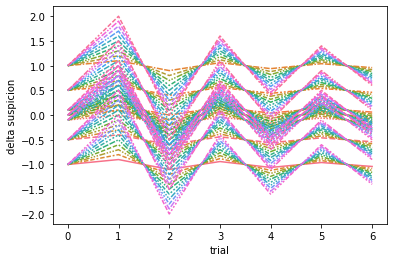

In [78]:
sns.lineplot(data=np.transpose(delta_matrix), legend=False).set(xlabel="trial", ylabel="delta suspicion")